# Exploratory Data Analysis (EDA) for dataset  `Act_Disaggregated`

In [34]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import requests
#import geopandas as gpd
%matplotlib inline

# Data Cleaning & Feature Engineering 
1. Visualizing a preview of the data of each table to get an idea of the information they contain.

In [35]:
act_disag = pd.read_excel(f'../Data/ACT_DESAGREGADO.xlsx')
df_cp = act_disag.copy()
df_cp

,NUMERO IDENTIFICACION,NOMBRE ENCUESTA\n,PREGUNTA\n,RESPUESTA,FE_RESULTADO
0,535255,Prueba de control del Asma ACT,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SU ASMA LE IMPIDIO LLEVAR A CABO SUS TAREAS HABITUALES EN EL TRABAJO, EL ESTUDIO O EL HOGAR?",POCAS VECES,2012-06-29
1,535255,Prueba de control del Asma ACT,DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SINTIO FALTA DE AIRE?,1 O 2 VECES A LA SEMANA,2012-06-29
2,535255,Prueba de control del Asma ACT,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA LOS SINTOMAS DE ASMA (SILBIDOS EN EL PECHO, TOS, FALTA DE AIRE, OPRESION O DOLOR EN EL PECHO) LO/LA HICIERON DESPERTAR DURANTE LA NOCHE O MAS TEMPRANO QUE DE COSTUMBRE POR LA MAÑANA?",DE 2 A 3 NOCHES EN A LA SEMANA,2012-06-29
3,535255,Prueba de control del Asma ACT,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA USO SU INHALADOR DE EFECTO INMEDIATO O SE HIZO NEBULIZACIONES (POR EJEMPLO, SALBUTAMOL?)",1 VEZ A LA SEMANA O MENOS,2012-06-29
4,535255,Prueba de control del Asma ACT,¿COMO CALIFICARIA EL CONTROL DE SU ASMA DURANTE LAS ULTIMAS 4 SEMANAS?,BIEN CONTROLADA,2012-06-29
...,...,...,...,...,...
8597,744564,Prueba de control del Asma ACT,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SU ASMA LE IMPIDIO LLEVAR A CABO SUS TAREAS HABITUALES EN EL TRABAJO, EL ESTUDIO O EL HOGAR?",POCAS VECES,2020-05-20
8598,744564,Prueba de control del Asma ACT,DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SINTIO FALTA DE AIRE?,1 O 2 VECES A LA SEMANA,2020-05-20
8599,744564,Prueba de control del Asma ACT,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA LOS SINTOMAS DE ASMA (SILBIDOS EN EL PECHO, TOS, FALTA DE AIRE, OPRESION O DOLOR EN EL PECHO) LO/LA HICIERON DESPERTAR DURANTE LA NOCHE O MAS TEMPRANO QUE DE COSTUMBRE POR LA MAÑANA?",NUNCA,2020-05-20
8600,744564,Prueba de control del Asma ACT,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA USO SU INHALADOR DE EFECTO INMEDIATO O SE HIZO NEBULIZACIONES (POR EJEMPLO, SALBUTAMOL?)",1 VEZ A LA SEMANA O MENOS,2020-05-20


### Analyse null data

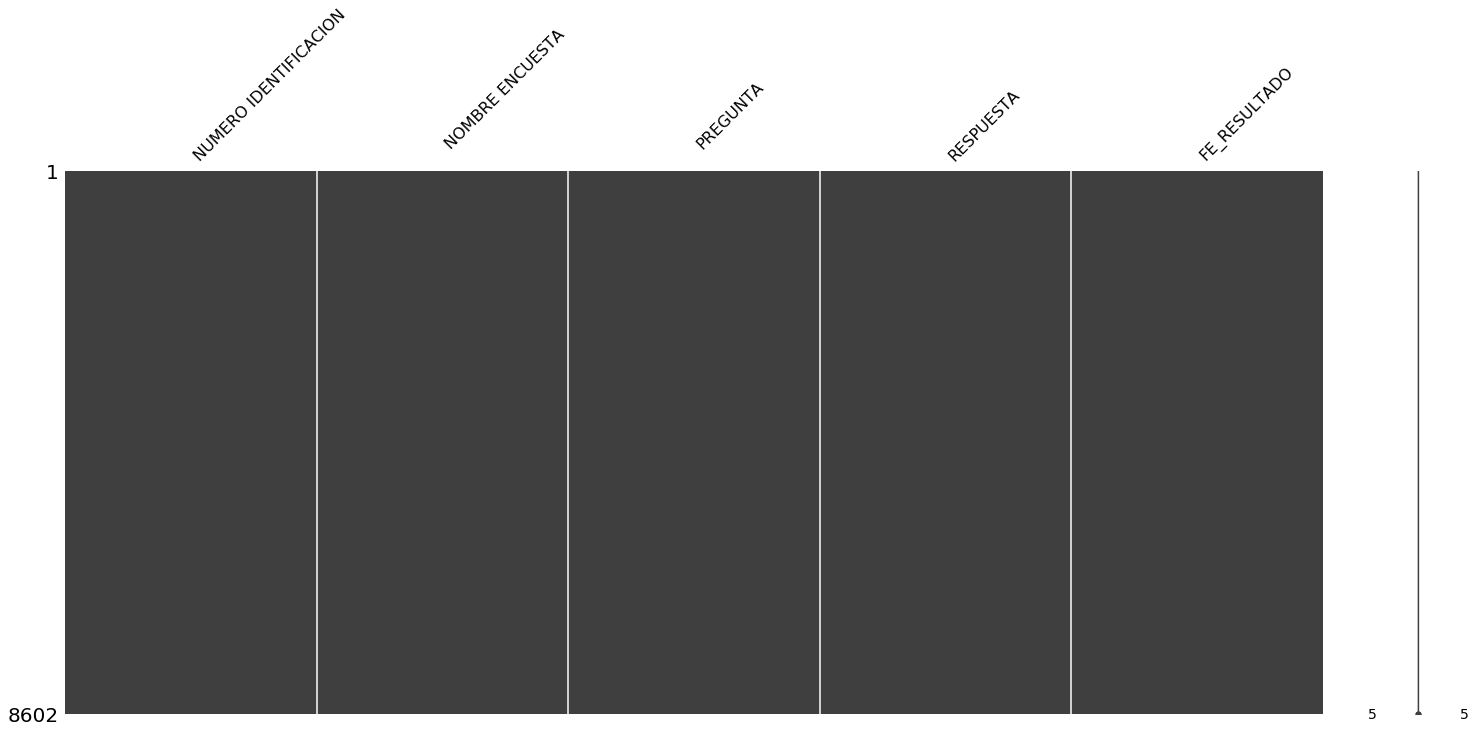

In [36]:
msno.matrix(msno.nullity_sort(df_cp, sort='descending'))

## Data description:
The ATC_DESAGREGADOS dataset together with the ACT collects information from the Asthma Control test. We have the patients ID, the name of the test taken and the questions as well as the scoring taken. These two datasets differ in that the ATC_DESAGREGADOS has the questions and answers of the test as such. While the ACT has the consolidated table (contains the scoring).

### Conclusion: 

We have 8602 patient records with 5 characteristics or columns


In [37]:
act_df = df_cp.groupby(['NUMERO IDENTIFICACION']).count()
#act_disag.columns
print(df_cp.info())
#print(act_disag.info)
print(act_df)
df_cp.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8602 entries, 0 to 8601
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   NUMERO IDENTIFICACION  8602 non-null   int64         
 1   NOMBRE ENCUESTA
       8602 non-null   object        
 2   PREGUNTA
              8602 non-null   object        
 3   RESPUESTA              8602 non-null   object        
 4   FE_RESULTADO           8602 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 336.1+ KB
None
                       NOMBRE ENCUESTA\n  PREGUNTA\n  RESPUESTA  FE_RESULTADO
NUMERO IDENTIFICACION                                                        
502989                 25                 25          25         25          
506808                 10                 10          10         10          
512938                 40                 40          40         40          
514102         

,NUMERO IDENTIFICACION,NOMBRE ENCUESTA\n,PREGUNTA\n,RESPUESTA,FE_RESULTADO
count,8.602000e+03,8602,8602,8602,8602
unique,NaN,1,32,31,526
top,NaN,Prueba de control del Asma ACT,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SU ASMA LE IMPIDIO LLEVAR A CABO SUS TAREAS HABITUALES EN EL TRABAJO, EL ESTUDIO O EL HOGAR?",NUNCA,2018-09-20 00:00:00
freq,NaN,8602,1715,2676,325
first,NaN,NaN,NaN,NaN,2012-06-29 00:00:00
last,NaN,NaN,NaN,NaN,2020-05-29 00:00:00
mean,1.254126e+06,NaN,NaN,NaN,NaN
std,4.153052e+05,NaN,NaN,NaN,NaN
min,5.029890e+05,NaN,NaN,NaN,NaN
25%,9.036320e+05,NaN,NaN,NaN,NaN


2. Now we will set a standard format for naming the fields: lowercase and underscore instead of spaces. For this, we will start first with the column `PREGUNTAS` and `RESPUESTA`, since there is a bunch of data mixed all together in this section

In [38]:
df_cp.columns = [col.lower() for col in  df_cp.columns]
df_cp.rename(columns={
    'numero identificacion':'id_paciente',
    'nombre encuesta\n':'nombre_encuesta',
    'respuesta' : 'respuesta',
    'fe_resultado': 'fe_resultado'
}, inplace = True)
df_cp.groupby('id_paciente').count()

,nombre_encuesta,pregunta\n,respuesta,fe_resultado
id_paciente,,,,
502989,25,25,25,25
506808,10,10,10,10
512938,40,40,40,40
514102,5,5,5,5
524006,60,60,60,60
...,...,...,...,...
1995390,10,10,10,10
1995612,45,45,45,45
1997065,20,20,20,20


In [39]:
df_cp.columns

Index(['id_paciente', 'nombre_encuesta', 'pregunta\n', 'respuesta',
       'fe_resultado'],
      dtype='object')

In [40]:
df_cp.rename(columns = {'pregunta\n':'pregunta'}, inplace = True) 
df_cp.columns

Index(['id_paciente', 'nombre_encuesta', 'pregunta', 'respuesta',
       'fe_resultado'],
      dtype='object')

Thus, column names have been fixed to a standard format that can be matched with the resting datasets


### Definition: ACT 

The ACT is a validated tool that consists of five questions that you can ask online and offline. It will provide you with an instant reminder of how well you have controlled your asthma over the past four weeks.

The results can help show how much control you really have over your asthma, which may surprise you. It is advisable to perform the test regularly, as asthma symptoms can vary from month to month and depending on the time of year.

You may find it helpful to discuss your ACT score with your doctor or nurse the next time you see them. This can help guide your conversation with them and ensure that you get the most out of your visit. 

### What questions are there in an ACT test 

<img src=https://4.bp.blogspot.com/-Dk-c_xGGdPE/Wu7gFY7jeiI/AAAAAAAAJMQ/n00Z5IPMvEAvol1PUfkQfY-CQQcR3fMggCLcBGAs/s1600/Control-si%25CC%2581ntomas-asma-gina.png width="900">


### Column section called `PREGUNTAS` - in dataset  `ACT_Disaggregated`: 
The following 4 questions have 1715 records, which means that 1715 patients carried out this survey and therefore we will have 1715 answers. 

A. DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA LOS SINTOMAS DE ASMA (SILBIDOS EN EL PECHO, TOS, FALTA DE AIRE, OPRESION O DOLOR EN EL PECHO) LO/LA HICIERON DESPERTAR DURANTE LA NOCHE O MAS TEMPRANO QUE DE COSTUMBRE POR LA MAÑANA?

B. DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SINTIO FALTA DE AIRE? 	

C. DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SU ASMA LE IMPIDIO LLEVAR A CABO SUS TAREAS HABITUALES EN EL TRABAJO, EL ESTUDIO O EL HOGAR?

D. DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA USO SU INHALADOR DE EFECTO INMEDIATO O SE HIZO NEBULIZACIONES (POR EJEMPLO, SALBUTAMOL?)

E. ¿COMO CALIFICARIA EL CONTROL DE SU ASMA DURANTE LAS ULTIMAS 4 SEMANAS? 

The question `E` is not part of the ACT test,but it is refered as the feedback question regarding the treatment. Therefore it will be considered within our anaylisis

1. CUANTO TIEMPO LLEVA DE TRATAMIENTO PARA SU PATOLOGIA PRINCIPAL? 
2. ¿COMO PUNTUARIA SU CALIDAD DE VIDA? 
3. ¿CON QUE FRECUENCIA TIENE SENTIMIENTOS NEGATIVOS, TALES COMO TRISTEZA, DESESPERANZA,    ANSIEDAD, DEPRESION? 	
4. ¿CUAL ES SU CAPACIDAD DE CONCENTRACION? 
5. ¿CUAN SALUDABLE ES EL AMBIENTE FISICO DE SU ALREDEDOR? 
6. ¿CUAN SATISFECHO ESTA CON EL ACCESO QUE TIENE A LOS SERVICIOS SANITARIOS? 	
7. ¿CUAN SATISFECHO ESTA CON EL APOYO QUE TIENE DE SUS AMIGOS? 
8. ¿CUAN SATISFECHO ESTA CON SU CAPACIDAD DE TRABAJO? 	
9. ¿CUAN SATISFECHO ESTA CON SU HABILIDAD PARA REALIZAR SUS ACTIVIDADES DE LA VIDA DIARIA? 
10. ¿CUAN SATISFECHO ESTA CON SU SUEÑO? 	
11. ¿CUAN SATISFECHO ESTA CON SU TRANSPORTE? 	
12. ¿CUAN SATISFECHO ESTA CON SU VIDA SEXUAL? 	
13. ¿CUAN SATISFECHO ESTA CON SUS RELACIONES PERSONALES? 
14. ¿CUAN SATISFECHO ESTA DE LAS CONDICIONES DEL LUGAR DONDE VIVE?
15. ¿CUAN SATISFECHO ESTA DE SI MISMO? 	
16. ¿CUAN SATISFECHO/A ESTA CON SU SALUD?
17. ¿CUANTA SEGURIDAD SIENTE EN SU VIDA DIARIA?
18. ¿CUANTO DISFRUTA DE LA VIDA?
19. ¿CUANTO NECESITA DE CUALQUIER TRATAMIENTO MEDICO PARA FUNCIONAR EN SU VIDA DIARIA? 
20. ¿EN QUE MEDIDA PIENSA QUE EL DOLOR (FISICO) LE IMPIDE HACER LO QUE NECESITA? 
21. ¿EN QUE MEDIDA SIENTE QUE SU VIDA TIENE SENTIDO? 	
22. ¿ES CAPAZ DE ACEPTAR SU APARIENCIA FISICA? 
23. ¿ES CAPAZ DE DESPLAZARSE DE UN LUGAR A OTRO?
24. ¿HASTA QUE PUNTO TIENE OPORTUNIDAD PARA REALIZAR ACTIVIDADES DE OCIO? 	
25. ¿QUE DISPONIBLE TIENE LA INFORMACION QUE NECESITA EN SU VIDA DIARIA? 
26. ¿TIENE ENERGIA SUFICIENTE PARA LA VIDA DIARIA? 	
27. ¿TIENE SUFICIENTE DINERO PARA CUBRIR SUS NECESIDADES?

Convert questions to lowercase format

In [41]:
pd.set_option('display.max_colwidth', -1)
#df_cp_lower = df_cp['pregunta'].str.lower()
#df_cp['pregunta'] = df_cp_lower
df_cp

,id_paciente,nombre_encuesta,pregunta,respuesta,fe_resultado
0,535255,Prueba de control del Asma ACT,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SU ASMA LE IMPIDIO LLEVAR A CABO SUS TAREAS HABITUALES EN EL TRABAJO, EL ESTUDIO O EL HOGAR?",POCAS VECES,2012-06-29
1,535255,Prueba de control del Asma ACT,DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SINTIO FALTA DE AIRE?,1 O 2 VECES A LA SEMANA,2012-06-29
2,535255,Prueba de control del Asma ACT,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA LOS SINTOMAS DE ASMA (SILBIDOS EN EL PECHO, TOS, FALTA DE AIRE, OPRESION O DOLOR EN EL PECHO) LO/LA HICIERON DESPERTAR DURANTE LA NOCHE O MAS TEMPRANO QUE DE COSTUMBRE POR LA MAÑANA?",DE 2 A 3 NOCHES EN A LA SEMANA,2012-06-29
3,535255,Prueba de control del Asma ACT,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA USO SU INHALADOR DE EFECTO INMEDIATO O SE HIZO NEBULIZACIONES (POR EJEMPLO, SALBUTAMOL?)",1 VEZ A LA SEMANA O MENOS,2012-06-29
4,535255,Prueba de control del Asma ACT,¿COMO CALIFICARIA EL CONTROL DE SU ASMA DURANTE LAS ULTIMAS 4 SEMANAS?,BIEN CONTROLADA,2012-06-29
...,...,...,...,...,...
8597,744564,Prueba de control del Asma ACT,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SU ASMA LE IMPIDIO LLEVAR A CABO SUS TAREAS HABITUALES EN EL TRABAJO, EL ESTUDIO O EL HOGAR?",POCAS VECES,2020-05-20
8598,744564,Prueba de control del Asma ACT,DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SINTIO FALTA DE AIRE?,1 O 2 VECES A LA SEMANA,2020-05-20
8599,744564,Prueba de control del Asma ACT,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA LOS SINTOMAS DE ASMA (SILBIDOS EN EL PECHO, TOS, FALTA DE AIRE, OPRESION O DOLOR EN EL PECHO) LO/LA HICIERON DESPERTAR DURANTE LA NOCHE O MAS TEMPRANO QUE DE COSTUMBRE POR LA MAÑANA?",NUNCA,2020-05-20
8600,744564,Prueba de control del Asma ACT,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA USO SU INHALADOR DE EFECTO INMEDIATO O SE HIZO NEBULIZACIONES (POR EJEMPLO, SALBUTAMOL?)",1 VEZ A LA SEMANA O MENOS,2020-05-20


In [42]:
#Save data of our interest
df_seg = df_cp.groupby(['respuesta','pregunta'], as_index=False).count()
df1_preg =  df_seg.iloc[:,0:2]
#Work with copy
df1_preg
#df_copy_2 =act_disag['PREGUNTA\n'].map(lambda x: x.lstrip("CON QUE FRECUENCIA LOS SINTOMAS DE ASMA"))

,respuesta,pregunta
0,1 O 2 VECES A LA SEMANA,DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SINTIO FALTA DE AIRE?
1,1 O 2 VECES AL DIA,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA USO SU INHALADOR DE EFECTO INMEDIATO O SE HIZO NEBULIZACIONES (POR EJEMPLO, SALBUTAMOL?)"
2,1 VEZ A LA SEMANA O MENOS,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA USO SU INHALADOR DE EFECTO INMEDIATO O SE HIZO NEBULIZACIONES (POR EJEMPLO, SALBUTAMOL?)"
3,2 O 3 VECES A LA SEMANA,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA USO SU INHALADOR DE EFECTO INMEDIATO O SE HIZO NEBULIZACIONES (POR EJEMPLO, SALBUTAMOL?)"
4,ALGO CONTROLADA,¿COMO CALIFICARIA EL CONTROL DE SU ASMA DURANTE LAS ULTIMAS 4 SEMANAS?
5,ALGUNAS VECES,"DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SU ASMA LE IMPIDIO LLEVAR A CABO SUS TAREAS HABITUALES EN EL TRABAJO, EL ESTUDIO O EL HOGAR?"
6,BASTANTE,¿CUAL ES SU CAPACIDAD DE CONCENTRACION?
7,BASTANTE,¿CUAN SALUDABLE ES EL AMBIENTE FISICO DE SU ALREDEDOR?
8,BASTANTE,¿CUANTO DISFRUTA DE LA VIDA?
9,BASTANTE,¿EN QUE MEDIDA SIENTE QUE SU VIDA TIENE SENTIDO?


Simplify questions to ACT items and feedback questions.

In [43]:
#A  = act_disag[act_disag['PREGUNTA\n'].str.contains("CON QUE FRECUENCIA LOS SINTOMAS DE ASMA")].count()
#act_disag.groupby('PREGUNTA\n').count()
df_cp['pregunta'].replace("DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA LOS SINTOMAS DE ASMA (SILBIDOS EN EL PECHO, TOS, FALTA DE AIRE, OPRESION O DOLOR EN EL PECHO) LO/LA HICIERON DESPERTAR DURANTE LA NOCHE O MAS TEMPRANO QUE DE COSTUMBRE POR LA MAÑANA?","A_ACT",inplace=True)
df_cp['pregunta'].replace("DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SINTIO FALTA DE AIRE?","B_ACT",inplace=True)
df_cp['pregunta'].replace("DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SU ASMA LE IMPIDIO LLEVAR A CABO SUS TAREAS HABITUALES EN EL TRABAJO, EL ESTUDIO O EL HOGAR?","C_ACT",inplace=True)
df_cp['pregunta'].replace("DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA USO SU INHALADOR DE EFECTO INMEDIATO O SE HIZO NEBULIZACIONES (POR EJEMPLO, SALBUTAMOL?)","D_ACT",inplace=True)

We will add the Feedback question refered as  `How did you qualify the test`, since this is refered as a feedback response that might be useful for our analysis. 

In [44]:
df_cp['pregunta'].replace("¿COMO CALIFICARIA EL CONTROL DE SU ASMA DURANTE LAS ULTIMAS 4 SEMANAS?","FEEDBACK",inplace=True)
df_cp

,id_paciente,nombre_encuesta,pregunta,respuesta,fe_resultado
0,535255,Prueba de control del Asma ACT,C_ACT,POCAS VECES,2012-06-29
1,535255,Prueba de control del Asma ACT,B_ACT,1 O 2 VECES A LA SEMANA,2012-06-29
2,535255,Prueba de control del Asma ACT,A_ACT,DE 2 A 3 NOCHES EN A LA SEMANA,2012-06-29
3,535255,Prueba de control del Asma ACT,D_ACT,1 VEZ A LA SEMANA O MENOS,2012-06-29
4,535255,Prueba de control del Asma ACT,FEEDBACK,BIEN CONTROLADA,2012-06-29
...,...,...,...,...,...
8597,744564,Prueba de control del Asma ACT,C_ACT,POCAS VECES,2020-05-20
8598,744564,Prueba de control del Asma ACT,B_ACT,1 O 2 VECES A LA SEMANA,2020-05-20
8599,744564,Prueba de control del Asma ACT,A_ACT,NUNCA,2020-05-20
8600,744564,Prueba de control del Asma ACT,D_ACT,1 VEZ A LA SEMANA O MENOS,2020-05-20


In [45]:
#df1 = df1[['RESPUESTA', 'NUMERO IDENTIFICACION', 'NOMBRE ENCUESTA\n', 'FE_RESULTADO', 'PREGUNTA']]
A_ACT = df_cp[df_cp['pregunta']=='A_ACT']
B_ACT = df_cp[df_cp['pregunta']=='B_ACT']
C_ACT = df_cp[df_cp['pregunta']=='C_ACT']
D_ACT = df_cp[df_cp['pregunta']=='D_ACT']
A_ACT['pregunta']

2       A_ACT
7       A_ACT
12      A_ACT
17      A_ACT
22      A_ACT
        ...  
8579    A_ACT
8584    A_ACT
8589    A_ACT
8594    A_ACT
8599    A_ACT
Name: pregunta, Length: 1715, dtype: object

Delete useless raws. 

In [46]:
A_ACT_Rows = df_cp[df_cp['pregunta'].str.contains('A_ACT')]
B_ACT_Rows = df_cp[df_cp['pregunta'].str.contains('B_ACT')]
C_ACT_Rows = df_cp[df_cp['pregunta'].str.contains('C_ACT')]
D_ACT_Rows = df_cp[df_cp['pregunta'].str.contains('D_ACT')]
FB_ACT_Rows = df_cp[df_cp['pregunta'].str.contains('FEEDBACK')]
frames = [A_ACT_Rows, B_ACT_Rows, C_ACT_Rows, D_ACT_Rows, FB_ACT_Rows]

result = pd.concat(frames)
N_patients = result.groupby('id_paciente').count().shape
print("The number if patients is {0}".format(N_patients))
result.groupby(['id_paciente','fe_resultado']).count()

The number if patients is (456, 4)


nombre_encuesta  pregunta  respuesta
id_paciente fe_resultado                                      
502989      2014-10-28    5                5         5        
            2017-01-03    5                5         5        
            2018-09-25    10               10        10       
            2020-04-24    5                5         5        
506808      2015-12-05    5                5         5        
...                      ..               ..        ..        
1998401     2016-10-11    5                5         5        
            2018-09-19    5                5         5        
            2020-04-22    5                5         5        
1999629     2018-05-04    5                5         5        
            2018-09-25    5                5         5        

[1693 rows x 3 columns]

Previously we had 8602 and now we have 8575 records, i.e, we have neglected the 27 additional questions due to its lack of relevance and low significance in our population

#### The previous result also tell us that we have actually 456 patients in this record, therefore we have a mean of 18 records per patients. It can be seen as well that: each patient took between 5 and 10 tests on 5 different dates. 

In [47]:
#df_final = result.pivot(index = "id_paciente", columns="pregunta", values="fe_resultado")
N = result.count()
duplicate_ids = result[result.duplicated('id_paciente')]['id_paciente']


## 'ANSWER' column
The possible answers are presented below. The objective would be to try to identify which questions identify the 4 ACT questions and which would be those of the other category

Text(0.5, 0, 'Year')

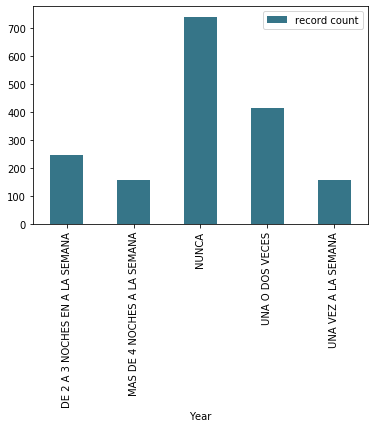

In [48]:
#df_final = pd.pivot_table(result, index = ["id_paciente"], columns = "pregunta", values = "respuesta",aggfunc='first')

df_final = pd.pivot_table(result, index = [result.index.values,"id_paciente","nombre_encuesta","fe_resultado"], columns = "pregunta", values = "respuesta",aggfunc='first').reset_index(['id_paciente','nombre_encuesta','fe_resultado'])
df_final = pd.pivot_table(result, index = [result.index.values,"id_paciente","nombre_encuesta","fe_resultado"], columns = "pregunta", values = "respuesta",aggfunc='first').reset_index(['id_paciente','nombre_encuesta','fe_resultado'])

#plt.figure(figsize=(7,4))
#df_final['B_ACT'].hist(bins=20)
df_final.columns
ax = df_final[["id_paciente", 'A_ACT']].groupby('A_ACT').size().plot(kind='bar', color='#367588')
ax.legend(['record count'])
ax.set_xlabel('Year')

Text(0, 0.5, 'Patients')

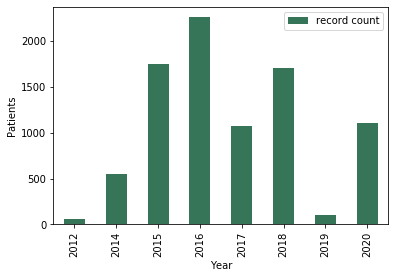

In [49]:
df_final['year'] = df_final['fe_resultado'].dt.year
df_final.columns
ax = df_final[["id_paciente", 'year']].groupby('year').size().plot(kind='bar', color='#367558')
ax.legend(['record count'])
ax.set_xlabel('Year')
ax.set_ylabel('Patients')

In [50]:
df_final.head(10)

pregunta,id_paciente,nombre_encuesta,fe_resultado,A_ACT,B_ACT,C_ACT,D_ACT,FEEDBACK,year
0,535255,Prueba de control del Asma ACT,2012-06-29,NaN,NaN,POCAS VECES,NaN,NaN,2012
1,535255,Prueba de control del Asma ACT,2012-06-29,NaN,1 O 2 VECES A LA SEMANA,NaN,NaN,NaN,2012
2,535255,Prueba de control del Asma ACT,2012-06-29,DE 2 A 3 NOCHES EN A LA SEMANA,NaN,NaN,NaN,NaN,2012
3,535255,Prueba de control del Asma ACT,2012-06-29,NaN,NaN,NaN,1 VEZ A LA SEMANA O MENOS,NaN,2012
4,535255,Prueba de control del Asma ACT,2012-06-29,NaN,NaN,NaN,NaN,BIEN CONTROLADA,2012
5,1680091,Prueba de control del Asma ACT,2012-09-27,NaN,NaN,POCAS VECES,NaN,NaN,2012
6,1680091,Prueba de control del Asma ACT,2012-09-27,NaN,1 O 2 VECES A LA SEMANA,NaN,NaN,NaN,2012
7,1680091,Prueba de control del Asma ACT,2012-09-27,UNA O DOS VECES,NaN,NaN,NaN,NaN,2012
8,1680091,Prueba de control del Asma ACT,2012-09-27,NaN,NaN,NaN,1 VEZ A LA SEMANA O MENOS,NaN,2012
9,1680091,Prueba de control del Asma ACT,2012-09-27,NaN,NaN,NaN,NaN,BIEN CONTROLADA,2012


### Convert each response to categorical data according to each question, respectively. 

In [51]:
df_final.loc[df_final['A_ACT']=='NUNCA', 'A_ACT'] = 1
df_final.loc[df_final['A_ACT']=='UNA VEZ A LA SEMANA', 'A_ACT'] = 2
df_final.loc[df_final['A_ACT']=='UNA O DOS VECES', 'A_ACT'] = 3
df_final.loc[df_final['A_ACT']=='DE 2 A 3 NOCHES EN A LA SEMANA', 'A_ACT'] = 4
df_final.loc[df_final['A_ACT']=='MAS DE 4 NOCHES A LA SEMANA', 'A_ACT'] = 5

df_final.loc[df_final['B_ACT']=='NUNCA', 'B_ACT'] = 1
df_final.loc[df_final['B_ACT']=='1 O 2 VECES A LA SEMANA', 'B_ACT'] = 2 
df_final.loc[df_final['B_ACT']=='DE 3 A 6 VECES A LA SEMANA', 'B_ACT'] = 3
df_final.loc[df_final['B_ACT']=='UNA VEZ AL DIA', 'B_ACT'] = 4
df_final.loc[df_final['B_ACT']=='MAS DE UNA VEZ AL DIA', 'B_ACT'] = 5

df_final.loc[df_final['C_ACT']=='NUNCA', 'C_ACT'] = 1
df_final.loc[df_final['C_ACT']=='POCAS VECES', 'C_ACT'] = 2 
df_final.loc[df_final['C_ACT']=='ALGUNAS VECES', 'C_ACT'] = 3
df_final.loc[df_final['C_ACT']=='CASI SIEMPRE', 'C_ACT'] = 4
df_final.loc[df_final['C_ACT']=='SIEMPRE', 'C_ACT'] = 5

df_final.loc[df_final['D_ACT']=='NUNCA', 'D_ACT'] = 1
df_final.loc[df_final['D_ACT']=='1 VEZ A LA SEMANA O MENOS', 'D_ACT'] = 2 
df_final.loc[df_final['D_ACT']=='2 O 3 VECES A LA SEMANA', 'D_ACT'] = 3
df_final.loc[df_final['D_ACT']=='1 O 2 VECES AL DIA', 'D_ACT'] = 4
df_final.loc[df_final['D_ACT']=='MAS DE 3 VECES AL DIA', 'D_ACT'] = 5

df_final.loc[df_final['FEEDBACK']=='MAL CONTROLADA', 'FEEDBACK'] = 1
df_final.loc[df_final['FEEDBACK']=='NADA CONTROLADA', 'FEEDBACK'] = 2 
df_final.loc[df_final['FEEDBACK']=='ALGO CONTROLADA', 'FEEDBACK'] = 3
df_final.loc[df_final['FEEDBACK']=='BIEN CONTROLADA', 'FEEDBACK'] = 4
df_final.loc[df_final['FEEDBACK']=='TOTALMENTE CONTROLADA', 'FEEDBACK'] = 5

In [52]:
df_final['A_ACT'] = df_final['A_ACT'].fillna(0)
df_final['B_ACT'] = df_final['B_ACT'].fillna(0)
df_final['C_ACT'] = df_final['C_ACT'].fillna(0)
df_final['D_ACT'] = df_final['D_ACT'].fillna(0)
df_final['FEEDBACK'] = df_final['FEEDBACK'].fillna(0)

In [53]:
df_final.drop(columns='nombre_encuesta', axis = 1, inplace = True)


In [54]:
df_final

pregunta,id_paciente,fe_resultado,A_ACT,B_ACT,C_ACT,D_ACT,FEEDBACK,year
0,535255,2012-06-29,0,0,2,0,0,2012
1,535255,2012-06-29,0,2,0,0,0,2012
2,535255,2012-06-29,4,0,0,0,0,2012
3,535255,2012-06-29,0,0,0,2,0,2012
4,535255,2012-06-29,0,0,0,0,4,2012
...,...,...,...,...,...,...,...,...
8597,744564,2020-05-20,0,0,2,0,0,2020
8598,744564,2020-05-20,0,2,0,0,0,2020
8599,744564,2020-05-20,1,0,0,0,0,2020
8600,744564,2020-05-20,0,0,0,2,0,2020


In [55]:
# To watch each category elements, refer to (i.e): df_final['FEEDBACK'].unique()
df_final.groupby('id_paciente').count().shape

(456, 7)


### Conclusion
We see that the ACT test is carried out by means of 4 questions, which are answered by 1715 people and which were registered by date and with their respective results. Same case with feedback question stored as FEEDBACK. 
While the other questions seem to be asked for only one person. Thence, they shall be deleted.

Final procedure. Convert ACT questions to columns as afore shown. In the final dataset `df_final`, we intend to leave the number of rows equivalent to the number of patients.Thus we have obtained a dataframe shaped as 456 patient records x 

In [56]:
df_final.describe(include='all')

pregunta,id_paciente,fe_resultado,A_ACT,B_ACT,C_ACT,D_ACT,FEEDBACK,year
count,8.575000e+03,8575,8575.000000,8575.000000,8575.000000,8575.000000,8575.000000,8575.000000
unique,NaN,525,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2018-09-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,325,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2012-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-05-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.253723e+06,NaN,0.474519,0.439767,0.393819,0.506356,0.749971,2016.713703
std,4.158964e+05,NaN,1.134843,1.052984,0.930716,1.191849,1.565234,1.768374
min,5.029890e+05,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000
25%,8.979600e+05,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000


In [57]:
df_final.groupby('id_paciente').count().shape

(456, 7)

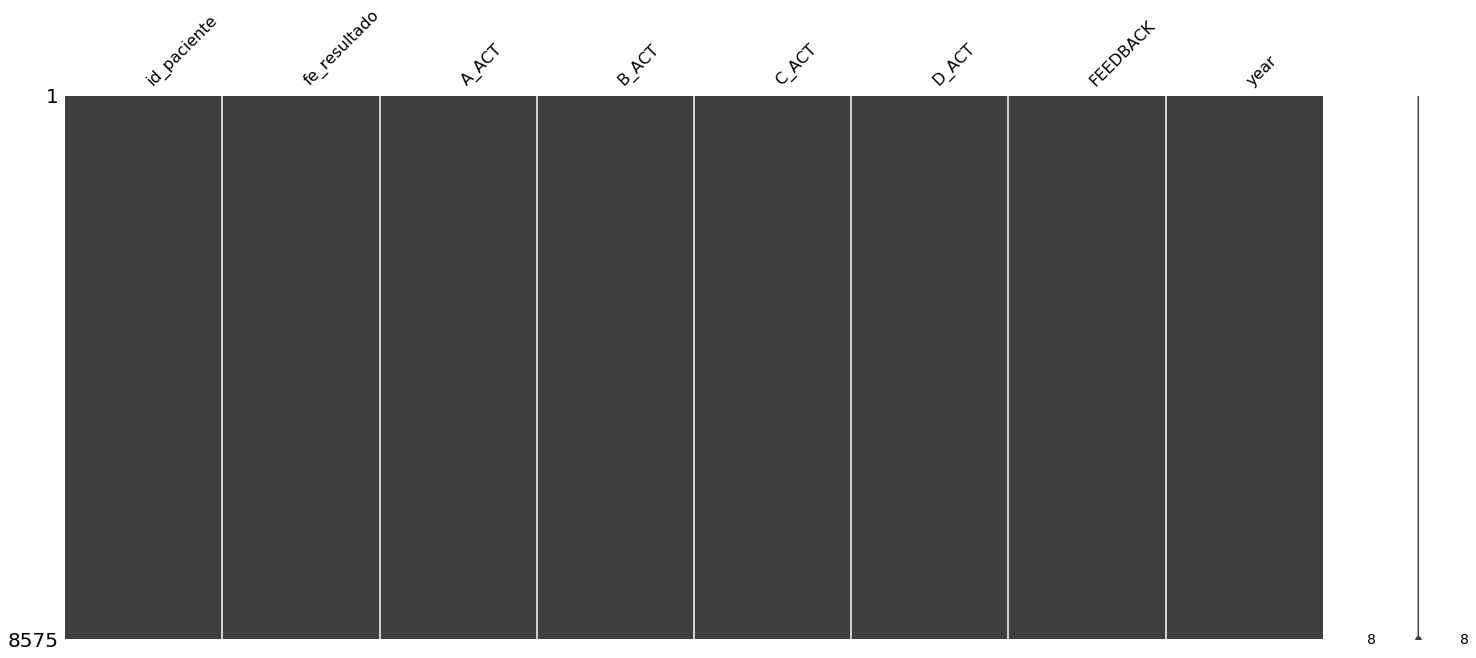

In [58]:
msno.matrix(msno.nullity_sort(df_final, sort='descending'))



In [59]:
df_final.columns

Index(['id_paciente', 'fe_resultado', 'A_ACT', 'B_ACT', 'C_ACT', 'D_ACT',
       'FEEDBACK', 'year'],
      dtype='object', name='pregunta')

In [60]:
df_final.rename(columns={ 'id_paciente':'id_patient',
                            'fe_resultado':'result_date',
                            'A_ACT':'A_ACT',
                            'B_ACT':'B_ACT',
                            'C_ACT':'C_ACT',
                            'D_ACT':'D_ACT',
                            'FEEDBACK':'FEEDBACK',                           
                    },inplace = True)

df_final = df_final.drop(['year'], axis=1)

In [61]:
df_final.dtypes



pregunta
id_patient     int64         
result_date    datetime64[ns]
A_ACT          int64         
B_ACT          int64         
C_ACT          int64         
D_ACT          int64         
FEEDBACK       int64         
dtype: object

In [62]:
df_final.columns

Index(['id_patient', 'result_date', 'A_ACT', 'B_ACT', 'C_ACT', 'D_ACT',
       'FEEDBACK'],
      dtype='object', name='pregunta')

In [63]:
df_final

pregunta,id_patient,result_date,A_ACT,B_ACT,C_ACT,D_ACT,FEEDBACK
0,535255,2012-06-29,0,0,2,0,0
1,535255,2012-06-29,0,2,0,0,0
2,535255,2012-06-29,4,0,0,0,0
3,535255,2012-06-29,0,0,0,2,0
4,535255,2012-06-29,0,0,0,0,4
...,...,...,...,...,...,...,...
8597,744564,2020-05-20,0,0,2,0,0
8598,744564,2020-05-20,0,2,0,0,0
8599,744564,2020-05-20,1,0,0,0,0
8600,744564,2020-05-20,0,0,0,2,0


In [64]:
df_final = df_final.set_index(df_final.index+1)
df_final.rename_axis(index={'name':'index'})
df_final.dtypes

pregunta
id_patient     int64         
result_date    datetime64[ns]
A_ACT          int64         
B_ACT          int64         
C_ACT          int64         
D_ACT          int64         
FEEDBACK       int64         
dtype: object

In [65]:
df_final.to_csv('./data/cleansed/act_desagregado.csv', sep=',')